# Pandas I

In [1]:
# `pd` is the conventional alias for Pandas, as `np` is for NumPy
from IPython import display
import pandas as pd

There are three fundamental data structures in pandas:

1. Series: 1D labeled array data; best thought of as columnar data
2. DataFrame: 2D tabular data with rows and columns
3. Index: A sequence of row/column labels

DataFrames, Series, and Indices can be represented visually in the following diagram.

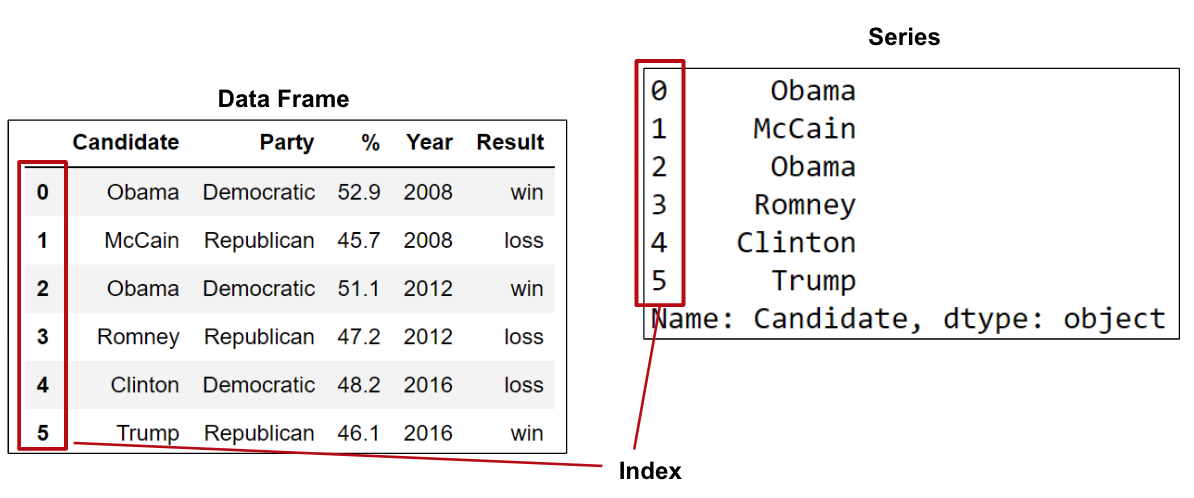

In [2]:
display.Image("https://ds100.org/course-notes/pandas_1/images/df_series_index.png")

In [3]:
s = pd.Series([-1, 10, 2])
print(s)

0    -1
1    10
2     2
dtype: int64


In [4]:
s.array # Data contained within the Series


<PandasArray>
[-1, 10, 2]
Length: 3, dtype: int64

In [5]:
s.index # The Index of the Series

RangeIndex(start=0, stop=3, step=1)

In [6]:
s = pd.Series([-1, 10, 2], index = ["a", "b", "c"])
s.index = ["first", "second", "third"]

s.index



Index(['first', 'second', 'third'], dtype='object')

In [7]:
ser = pd.Series([4, -2, 0, 6], index = ["a", "b", "c", "d"])

[x**2 for x in ser[ser>0]]

[16, 36]

In [8]:
df_list = pd.DataFrame([[1, "one"], [2, "two"]], columns = ["Number", "Description"])
df_list


Number Description
0       1         one
1       2         two

In [9]:
df_dict = pd.DataFrame({"Fruit": ["Strawberry", "Orange"], "Price": [5.49, 3.99]})
df_dict

Fruit  Price
0  Strawberry   5.49
1      Orange   3.99

In [10]:
# Notice how our indices, or row labels, are the same

s_a = pd.Series(["a1", "a2", "a3"], index = ["r1", "r2", "r3"])
s_b = pd.Series(["b1", "b2", "b3"], index = ["r1", "r2", "r3"])

df = pd.DataFrame({"A-column": s_a, "B-column": s_b})
df

A-column B-column
r1       a1       b1
r2       a2       b2
r3       a3       b3

The major takeaway: we can think of a DataFrame as a collection of Series that all share the same Index.

In [11]:
df.loc["r1":"r3",:"B-column"]

A-column B-column
r1       a1       b1
r2       a2       b2
r3       a3       b3

In [12]:
df["B-column"]

r1    b1
r2    b2
r3    b3
Name: B-column, dtype: object

In [13]:
df[0:2]

A-column B-column
r1       a1       b1
r2       a2       b2

## Lab Demo Notes

In [15]:
df = pd.read_csv("/Users/jordan.arlan/Documents/DS100/Data/diversityindex.csv")
df.head()

Location  Diversity-Index  \
0  Aleutians West Census Area, AK         0.769346   
1               Queens County, NY         0.742224   
2                 Maui County, HI         0.740757   
3              Alameda County, CA         0.740399   
4      Aleutians East Borough, AK         0.738867   

   Black or African American alone, percent, 2013  \
0                                             7.4   
1                                            20.9   
2                                             0.8   
3                                            12.4   
4                                             7.7   

   American Indian and Alaska Native alone, percent, 2013  \
0                                               13.8        
1                                                1.3        
2                                                0.6        
3                                                1.2        
4                                               21.8        

   Asian alone, percent, 2013  \
0                        31.1   
1                        25.2   
2                        28.8   
3                        28.2   
4                        41.4   

   Native Hawaiian and Other Pacific Islander alone, percent,  \
0                                                2.3            
1                                                0.2            
2                                               10.6            
3                                                1.0            
4                                                0.7            

   Two or More Races, percent, 2013  Hispanic or Latino, percent, 2013  \
0                               4.8                               14.6   
1                               2.7                               28.0   
2                              23.3                               10.7   
3                               5.2                               22.7   
4                               3.7                               13.5   

   White alone, not Hispanic or Latino, percent, 2013  
0                                               29.2   
1                                               26.7   
2                                               31.5   
3                                               33.2   
4                                               12.9

### Adding new features by splitting an existing one

In [16]:
df[["City","State"]] = df["Location"].str.split(",", expand=True)
df.head()

Location  Diversity-Index  \
0  Aleutians West Census Area, AK         0.769346   
1               Queens County, NY         0.742224   
2                 Maui County, HI         0.740757   
3              Alameda County, CA         0.740399   
4      Aleutians East Borough, AK         0.738867   

   Black or African American alone, percent, 2013  \
0                                             7.4   
1                                            20.9   
2                                             0.8   
3                                            12.4   
4                                             7.7   

   American Indian and Alaska Native alone, percent, 2013  \
0                                               13.8        
1                                                1.3        
2                                                0.6        
3                                                1.2        
4                                               21.8        

   Asian alone, percent, 2013  \
0                        31.1   
1                        25.2   
2                        28.8   
3                        28.2   
4                        41.4   

   Native Hawaiian and Other Pacific Islander alone, percent,  \
0                                                2.3            
1                                                0.2            
2                                               10.6            
3                                                1.0            
4                                                0.7            

   Two or More Races, percent, 2013  Hispanic or Latino, percent, 2013  \
0                               4.8                               14.6   
1                               2.7                               28.0   
2                              23.3                               10.7   
3                               5.2                               22.7   
4                               3.7                               13.5   

   White alone, not Hispanic or Latino, percent, 2013  \
0                                               29.2    
1                                               26.7    
2                                               31.5    
3                                               33.2    
4                                               12.9    

                         City State  
0  Aleutians West Census Area    AK  
1               Queens County    NY  
2                 Maui County    HI  
3              Alameda County    CA  
4      Aleutians East Borough    AK

In [17]:
df.tail()

Location  Diversity-Index  \
3190      Osage County, MO         0.037540   
3191    Lincoln County, WV         0.035585   
3192     Leslie County, KY         0.035581   
3193     Blaine County, NE         0.023784   
3194  Keya Paha County, NE         0.021816   

      Black or African American alone, percent, 2013  \
3190                                             0.3   
3191                                             0.2   
3192                                             0.4   
3193                                             0.2   
3194                                             0.0   

      American Indian and Alaska Native alone, percent, 2013  \
3190                                                0.2        
3191                                                0.1        
3192                                                0.1        
3193                                                0.0        
3194                                                0.1        

      Asian alone, percent, 2013  \
3190                         0.1   
3191                         0.1   
3192                         0.2   
3193                         0.0   
3194                         0.1   

      Native Hawaiian and Other Pacific Islander alone, percent,  \
3190                                                0.0            
3191                                                0.0            
3192                                                0.0            
3193                                                0.0            
3194                                                0.0            

      Two or More Races, percent, 2013  Hispanic or Latino, percent, 2013  \
3190                               0.7                                0.6   
3191                               0.7                                0.6   
3192                               0.7                                0.5   
3193                               0.8                                0.2   
3194                               0.6                                0.5   

      White alone, not Hispanic or Latino, percent, 2013              City  \
3190                                               98.1       Osage County   
3191                                               98.2     Lincoln County   
3192                                               98.2      Leslie County   
3193                                               98.8      Blaine County   
3194                                               98.9   Keya Paha County   

     State  
3190    MO  
3191    WV  
3192    KY  
3193    NE  
3194    NE

### Using loc to slice the DataFrame

In [18]:
df.loc[0,['Location', 'Diversity-Index']]

Location           Aleutians West Census Area, AK
Diversity-Index                          0.769346
Name: 0, dtype: object

In [19]:
#Look at the middle
df.loc[len(df)//2-1:len(df)//2+1:, ['Location', 'Diversity-Index']]

Location  Diversity-Index
1596  Labette County, KS         0.269689
1597    Woods County, OK         0.269659
1598    Cache County, UT         0.269504

In [20]:
df.loc[[0, 10, 20, 50], ["State","Diversity-Index"]]

State  Diversity-Index
0     AK         0.769346
10    HI         0.714410
20    CA         0.687281
50    VA         0.649676

In [21]:
df.set_index("City", inplace=True)
df

Location  Diversity-Index  \
City                                                                          
Aleutians West Census Area  Aleutians West Census Area, AK         0.769346   
Queens County                            Queens County, NY         0.742224   
Maui County                                Maui County, HI         0.740757   
Alameda County                          Alameda County, CA         0.740399   
Aleutians East Borough          Aleutians East Borough, AK         0.738867   
...                                                    ...              ...   
Osage County                              Osage County, MO         0.037540   
Lincoln County                          Lincoln County, WV         0.035585   
Leslie County                            Leslie County, KY         0.035581   
Blaine County                            Blaine County, NE         0.023784   
Keya Paha County                      Keya Paha County, NE         0.021816   

                            Black or African American alone, percent, 2013  \
City                                                                         
Aleutians West Census Area                                             7.4   
Queens County                                                         20.9   
Maui County                                                            0.8   
Alameda County                                                        12.4   
Aleutians East Borough                                                 7.7   
...                                                                    ...   
Osage County                                                           0.3   
Lincoln County                                                         0.2   
Leslie County                                                          0.4   
Blaine County                                                          0.2   
Keya Paha County                                                       0.0   

                            American Indian and Alaska Native alone, percent, 2013  \
City                                                                                 
Aleutians West Census Area                                               13.8        
Queens County                                                             1.3        
Maui County                                                               0.6        
Alameda County                                                            1.2        
Aleutians East Borough                                                   21.8        
...                                                                       ...        
Osage County                                                              0.2        
Lincoln County                                                            0.1        
Leslie County                                                             0.1        
Blaine County                                                             0.0        
Keya Paha County                                                          0.1        

                            Asian alone, percent, 2013  \
City                                                     
Aleutians West Census Area                        31.1   
Queens County                                     25.2   
Maui County                                       28.8   
Alameda County                                    28.2   
Aleutians East Borough                            41.4   
...                                                ...   
Osage County                                       0.1   
Lincoln County                                     0.1   
Leslie County                                      0.2   
Blaine County                                      0.0   
Keya Paha County                                   0.1   

                            Native Hawaiian and Other Pacific Islander alone, percent,  \
City                                       

In [22]:
df.loc["Los Angeles County", :]

Location                                                      Los Angeles County, CA
Diversity-Index                                                             0.661865
Black or African American alone, percent, 2013                                   9.2
American Indian and Alaska Native alone, percent, 2013                           1.5
Asian alone, percent, 2013                                                      14.6
Native Hawaiian and Other Pacific Islander alone, percent,                       0.4
Two or More Races, percent, 2013                                                 2.9
Hispanic or Latino, percent, 2013                                               48.3
White alone, not Hispanic or Latino, percent, 2013                              27.2
State                                                                             CA
Name: Los Angeles County, dtype: object

In [23]:
df.reset_index(inplace=True)
df

City                        Location  \
0     Aleutians West Census Area  Aleutians West Census Area, AK   
1                  Queens County               Queens County, NY   
2                    Maui County                 Maui County, HI   
3                 Alameda County              Alameda County, CA   
4         Aleutians East Borough      Aleutians East Borough, AK   
...                          ...                             ...   
3190                Osage County                Osage County, MO   
3191              Lincoln County              Lincoln County, WV   
3192               Leslie County               Leslie County, KY   
3193               Blaine County               Blaine County, NE   
3194            Keya Paha County            Keya Paha County, NE   

      Diversity-Index  Black or African American alone, percent, 2013  \
0            0.769346                                             7.4   
1            0.742224                                            20.9   
2            0.740757                                             0.8   
3            0.740399                                            12.4   
4            0.738867                                             7.7   
...               ...                                             ...   
3190         0.037540                                             0.3   
3191         0.035585                                             0.2   
3192         0.035581                                             0.4   
3193         0.023784                                             0.2   
3194         0.021816                                             0.0   

      American Indian and Alaska Native alone, percent, 2013  \
0                                                  13.8        
1                                                   1.3        
2                                                   0.6        
3                                                   1.2        
4                                                  21.8        
...                                                 ...        
3190                                                0.2        
3191                                                0.1        
3192                                                0.1        
3193                                                0.0        
3194                                                0.1        

      Asian alone, percent, 2013  \
0                           31.1   
1                           25.2   
2                           28.8   
3                           28.2   
4                           41.4   
...                          ...   
3190                         0.1   
3191                         0.1   
3192                         0.2   
3193                         0.0   
3194                         0.1   

      Native Hawaiian and Other Pacific Islander alone, percent,  \
0                                                   2.3            
1                                                   0.2            
2                                                  10.6            
3                                                   1.0            
4                                                   0.7            
...                                                 ...            
3190                                                0.0            
3191                                                0.0            
3192                                                0.0            
3193                                                0.0            
3194                                                0.0            

      Two or More Races, percent, 2013  Hispanic or Latino, percent, 2013  \
0                                  4.8                               14.6   
1                                  2.7                               28.0   
2                                 23.3                               10.7   
3      

### Using iloc to slice the DataFrame

In [24]:
df.iloc[10:20, :]

City                      Location  Diversity-Index  \
10           Honolulu County           Honolulu County, HI         0.714410   
11            Robeson County            Robeson County, NC         0.704067   
12           Gwinnett County           Gwinnett County, GA         0.702974   
13  Yakutat City and Borough  Yakutat City and Borough, AK         0.698748   
14        Santa Clara County        Santa Clara County, CA         0.694312   
15              Kings County              Kings County, NY         0.692349   
16          San Mateo County          San Mateo County, CA         0.691029   
17        Manassas Park city        Manassas Park city, VA         0.690899   
18             Dallas County             Dallas County, TX         0.690390   
19         Montgomery County         Montgomery County, MD         0.687803   

    Black or African American alone, percent, 2013  \
10                                             3.0   
11                                            24.7   
12                                            26.3   
13                                             0.9   
14                                             2.9   
15                                            35.4   
16                                             3.0   
17                                            15.0   
18                                            23.1   
19                                            18.6   

    American Indian and Alaska Native alone, percent, 2013  \
10                                                0.4        
11                                               39.5        
12                                                0.8        
13                                               36.6        
14                                                1.4        
15                                                1.0        
16                                                0.9        
17                                                1.3        
18                                                1.1        
19                                                0.7        

    Asian alone, percent, 2013  \
10                        42.6   
11                         0.7   
12                        11.2   
13                         5.6   
14                        34.1   
15                        11.7   
16                        26.9   
17                         9.7   
18                         5.7   
19                        14.9   

    Native Hawaiian and Other Pacific Islander alone, percent,  \
10                                                9.4            
11                                                0.1            
12                                                0.1            
13                                                1.4            
14                                                0.5            
15                                                0.1            
16                                                1.6            
17                                                0.3            
18                                                0.1            
19                                                0.1            

    Two or More Races, percent, 2013  Hispanic or Latino, percent, 2013  \
10                              21.7                                9.2   
11                               2.5                                8.0   
12                               2.4                               20.4   
13                              15.9                                3.1   
14                               4.0                               26.8   
15                               2.3                               19.6   
16                               4.4                               25.4   
17                               3.7                               34.7   
18                               1.7                               39.0   
19                      

In [25]:
df.iloc[[13, 17], [0, 2, 3]]

City  Diversity-Index  \
13  Yakutat City and Borough         0.698748   
17        Manassas Park city         0.690899   

    Black or African American alone, percent, 2013  
13                                             0.9  
17                                            15.0

### Using [] to slice the DataFrame

In [26]:
df[-5:]


City              Location  Diversity-Index  \
3190      Osage County      Osage County, MO         0.037540   
3191    Lincoln County    Lincoln County, WV         0.035585   
3192     Leslie County     Leslie County, KY         0.035581   
3193     Blaine County     Blaine County, NE         0.023784   
3194  Keya Paha County  Keya Paha County, NE         0.021816   

      Black or African American alone, percent, 2013  \
3190                                             0.3   
3191                                             0.2   
3192                                             0.4   
3193                                             0.2   
3194                                             0.0   

      American Indian and Alaska Native alone, percent, 2013  \
3190                                                0.2        
3191                                                0.1        
3192                                                0.1        
3193                                                0.0        
3194                                                0.1        

      Asian alone, percent, 2013  \
3190                         0.1   
3191                         0.1   
3192                         0.2   
3193                         0.0   
3194                         0.1   

      Native Hawaiian and Other Pacific Islander alone, percent,  \
3190                                                0.0            
3191                                                0.0            
3192                                                0.0            
3193                                                0.0            
3194                                                0.0            

      Two or More Races, percent, 2013  Hispanic or Latino, percent, 2013  \
3190                               0.7                                0.6   
3191                               0.7                                0.6   
3192                               0.7                                0.5   
3193                               0.8                                0.2   
3194                               0.6                                0.5   

      White alone, not Hispanic or Latino, percent, 2013 State  
3190                                               98.1     MO  
3191                                               98.2     WV  
3192                                               98.2     KY  
3193                                               98.8     NE  
3194                                               98.9     NE

In [27]:
df["Diversity-Index"]

0       0.769346
1       0.742224
2       0.740757
3       0.740399
4       0.738867
          ...   
3190    0.037540
3191    0.035585
3192    0.035581
3193    0.023784
3194    0.021816
Name: Diversity-Index, Length: 3195, dtype: float64

In [28]:
df[["City", "State", "Location"]]

City State                        Location
0     Aleutians West Census Area    AK  Aleutians West Census Area, AK
1                  Queens County    NY               Queens County, NY
2                    Maui County    HI                 Maui County, HI
3                 Alameda County    CA              Alameda County, CA
4         Aleutians East Borough    AK      Aleutians East Borough, AK
...                          ...   ...                             ...
3190                Osage County    MO                Osage County, MO
3191              Lincoln County    WV              Lincoln County, WV
3192               Leslie County    KY               Leslie County, KY
3193               Blaine County    NE               Blaine County, NE
3194            Keya Paha County    NE            Keya Paha County, NE

[3195 rows x 3 columns]